#### Objective:
Predicting whether the job post is genuine or fake

#### The dataset has the following variables:<br>
<b>Title:</b> The title of the job ad entry.<br>
<b>Location:</b> Geographical location of the job ad.<br>
<b>Department:</b> Corporate department.<br>
<b>Salary_range:</b> Indicative salary range.<br>
<b>Company_profile:</b> A brief company description.<br>
<b>Description:</b> The details of the job ad.<br>
<b>Requirements:</b> Enlisted requirements for the job opening.<br>
<b>Benefits:</b> Enlisted offered benefits by the employer.<br>
<b>Telecommuting:</b> True for telecommuting positions.<br>
<b>Has_company_logo:</b> True if the company logo is present.<br>
<b>Has_questions:</b> True if screening questions are present.<br>
<b>Employment_type:</b> Full-time, Part-time, Contract, etc.<br>
<b>Required_experience:</b> Executive, Entry-level, Intern, etc.<br>
<b>Required_education:</b> Doctorate, Master’s degree, Bachelor’s, etc.<br>
<b>Industry:</b> Automotive, IT, Health care, Real estate, etc.<br>
<b>Function:</b> Consulting, Engineering, Research, Sales, etc.<br>
<b>Fraudulent (Target Variable):</b> 1 if fake posting else 0.

#### IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('Display.max_rows',None)    #Set the max number of rows
pd.set_option('Display.max_columns',None) #Set the max number of columns

#### LOADING DATA

In [2]:
df = pd.read_csv('fake_job_postings.csv',index_col=0)
df.head()

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
job_id,,,,,,,,,,,,,,,,,
1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


#### ANALYSING THE DATASET

In [3]:
df.shape

(17880, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17880 entries, 1 to 17880
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                17880 non-null  object
 1   location             17534 non-null  object
 2   department           6333 non-null   object
 3   salary_range         2868 non-null   object
 4   company_profile      14572 non-null  object
 5   description          17879 non-null  object
 6   requirements         15185 non-null  object
 7   benefits             10670 non-null  object
 8   telecommuting        17880 non-null  int64 
 9   has_company_logo     17880 non-null  int64 
 10  has_questions        17880 non-null  int64 
 11  employment_type      14409 non-null  object
 12  required_experience  10830 non-null  object
 13  required_education   9775 non-null   object
 14  industry             12977 non-null  object
 15  function             11425 non-null  object
 16  frau

In [5]:
df.describe()

,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000
mean,0.042897,0.795302,0.491723,0.048434
std,0.202631,0.403492,0.499945,0.214688
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000


In [37]:
df['fraudulent'].value_counts()

0    17014
1      866
Name: fraudulent, dtype: int64

#### MISSING VALUE PERCENTAGE

In [6]:
mis_val =pd.DataFrame()
mis_val['Number of Missing Values']=df.isnull().sum()
mis_val['Percentage of Missing Values']=(df.isnull().sum()/df.shape[0])*100
mis_val

,Number of Missing Values,Percentage of Missing Values
title,0,0.000000
location,346,1.935123
department,11547,64.580537
salary_range,15012,83.959732
company_profile,3308,18.501119
description,1,0.005593
requirements,2695,15.072707
benefits,7210,40.324385
telecommuting,0,0.000000
has_company_logo,0,0.000000


### DATA VISUALIZATION

#### UNIVARIATE ANALYSIS

#### Required Education

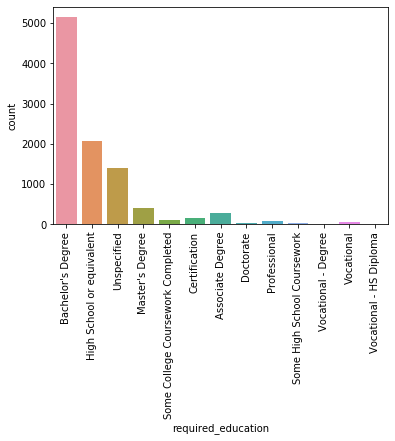

In [40]:
sns.countplot(df['required_education'])
plt.xticks(rotation = 90)
plt.show()

#### Employment type

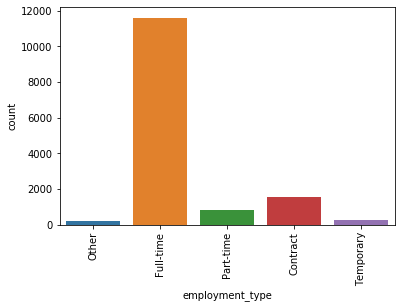

In [41]:
sns.countplot(df['employment_type'])
plt.xticks(rotation = 90)
plt.show()

#### Required Experience

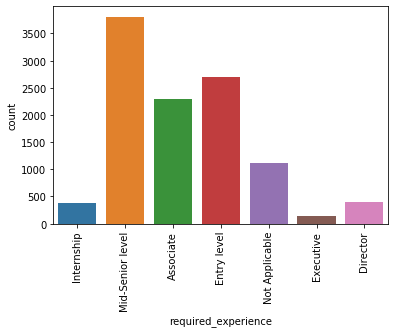

In [42]:
sns.countplot(df['required_experience'])
plt.xticks(rotation = 90)
plt.show()

#### Job Function

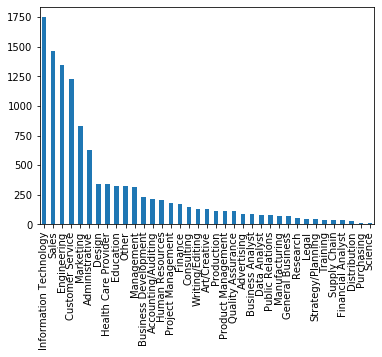

In [46]:
df['function'].value_counts().plot(kind = 'bar')
plt.xticks(rotation = 90)
plt.show()

#### department

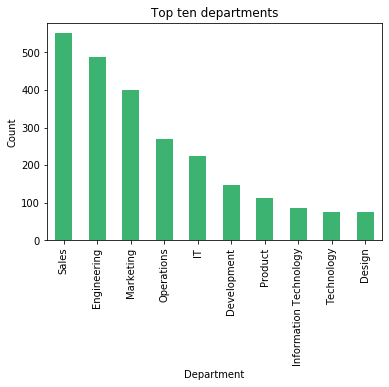

In [8]:
department = df['department'].value_counts()[:10]
department.plot(kind = 'bar', color = 'mediumseagreen')
plt.title('Top ten departments')
plt.xlabel('Department')
plt.ylabel('Count')
plt.show()

#### industry

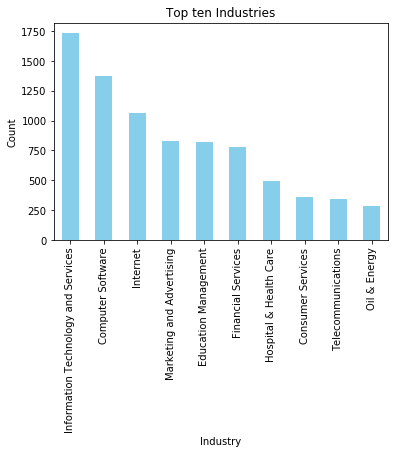

In [9]:
industry = df['industry'].value_counts()[:10]
industry.plot(kind = 'bar', color = 'skyblue')
plt.title('Top ten Industries')
plt.xlabel('Industry')
plt.ylabel('Count')
plt.show()

#### TARGET VARIABLE -  Fraudulent

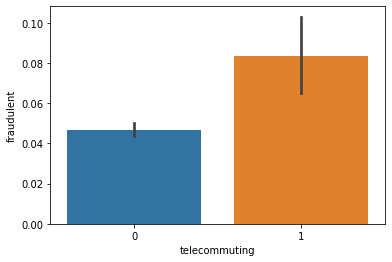

In [10]:
sns.barplot(df['telecommuting'],df['fraudulent'])
plt.show()

#### BIVARIATE ANALYSIS

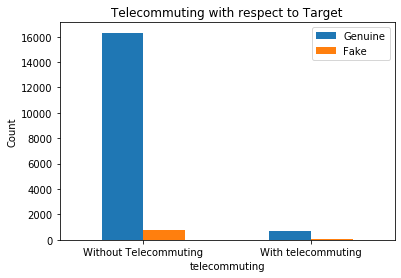

In [11]:
pd.crosstab(df['telecommuting'],df['fraudulent']).plot(kind='bar')
plt.title('Telecommuting with respect to Target')
plt.xticks([0,1],['Without Telecommuting','With telecommuting'],rotation=360)
plt.ylabel('Count')
plt.legend(['Genuine','Fake'])
plt.show()

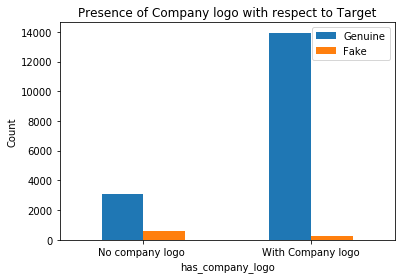

In [12]:
pd.crosstab(df['has_company_logo'],df['fraudulent']).plot(kind='bar')
plt.title('Presence of Company logo with respect to Target')
plt.xticks([0,1],['No company logo ','With Company logo'],rotation=360)
plt.ylabel('Count')
plt.legend(['Genuine','Fake'])
plt.show()

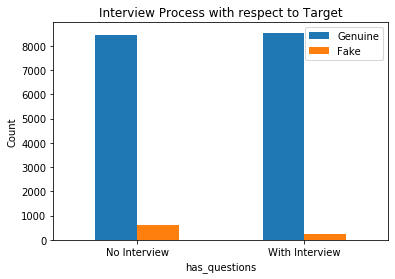

In [13]:
pd.crosstab(df['has_questions'],df['fraudulent']).plot(kind='bar')
plt.title('Interview Process with respect to Target')
plt.xticks([0,1],['No Interview','With Interview'],rotation=360)
plt.ylabel('Count')
plt.legend(['Genuine','Fake'])
plt.show()

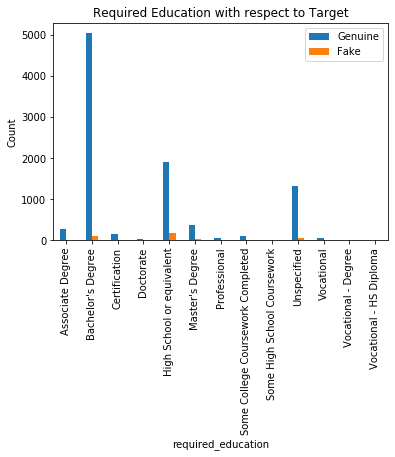

In [14]:
pd.crosstab(df['required_education'],df['fraudulent']).plot(kind='bar')
plt.title('Required Education with respect to Target')
#plt.xticks([0,1],['No Interview','With Interview'],rotation=360)
plt.ylabel('Count')
plt.legend(['Genuine','Fake'])
plt.show()

#### FEATURE ENGINEERING

In [15]:
# Splitting the location to country and state :
df['Country']=df.location.apply(lambda x: pd.Series(str(x).split(",")))[0]
df['State']=df.location.apply(lambda x: pd.Series(str(x).split(",")))[1]
df.head(20)

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,Country,State
job_id,,,,,,,,,,,,,,,,,,,
1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0,US,NY
2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,NZ,
3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0,US,IA
4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,US,DC
5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,US,FL
6,Accounting Clerk,"US, MD,",NaN,NaN,NaN,Job OverviewApex is an environmental consultin...,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,0,US,MD
7,Head of Content (m/f),"DE, BE, Berlin",ANDROIDPIT,20000-28000,"Founded in 2009, the Fonpit AG rose with its i...",Your Responsibilities: Manage the English-spea...,Your Know-How: ...,Your Benefits: Being part of a fast-growing co...,0,1,1,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,0,DE,BE
8,Lead Guest Service Specialist,"US, CA, San Francisco",NaN,NaN,Airenvy’s mission is to provide lucrative yet ...,Who is Airenvy?Hey there! We are seasoned entr...,"Experience with CRM software, live chat, and p...",Competitive Pay. You'll be able to eat steak e...,0,1,1,NaN,NaN,NaN,NaN,NaN,0,US,CA
9,HP BSM SME,"US, FL, Pensacola",NaN,NaN,Solutions3 is a woman-owned small business who...,Implementation/Configuration/Testing/Training ...,MUST BE A US CITIZEN.An active TS/SCI clearanc...,NaN,0,1,1,Full-time,Associate,NaN,Information Technology and Services,NaN,0,US,FL


In [16]:
# fraudlent cases countrywise
cou=df['Country'].value_counts()
cou=pd.DataFrame(cou)
number =[]
for i in cou.index:
    number.append(df[df['Country']==i]['fraudulent'].sum())
cou['Number of Fraudulent'] = number
cou.sort_values(by='Number of Fraudulent',axis=0,ascending=False)

,Country,Number of Fraudulent
US,10656,730
AU,214,40
GB,2384,23
nan,346,19
CA,457,12
MY,21,12
QA,21,6
BH,9,5
IN,276,4
PL,76,3


In [17]:
#pip install geopy

In [18]:
#function to get longitude and latitude data from country name
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="myGeocoder")
def geolocate(country):
    try:
        # Geolocate the center of the country
        loc = geolocator.geocode(country)
        # And return latitude and longitude
        return (loc.latitude, loc.longitude)
    except:
        # Return missing value
        return np.nan

In [19]:
#unique country with their co-ordinates
unique_country=[i for i in df['Country'].unique() ]
#unique_country=unique_country[:40]
print(unique_country)
lat_long=list(map(geolocate,unique_country))

['US', 'NZ', 'DE', 'GB', 'AU', 'SG', 'IL', 'AE', 'CA', 'IN', 'EG', 'PL', 'GR', 'nan', 'PK', 'BE', 'BR', 'SA', 'DK', 'RU', 'ZA', 'CY', 'HK', 'TR', 'IE', 'LT', 'JP', 'NL', 'AT', 'KR', 'FR', 'EE', 'TH', 'PA', 'KE', 'MU', 'MX', 'RO', 'MY', 'FI', 'CN', 'ES', 'SE', 'CL', 'UA', 'QA', 'IT', 'LV', 'IQ', 'BG', 'PH', 'CZ', 'VI', 'MT', 'HU', 'BD', 'KW', 'LU', 'NG', 'RS', 'BY', 'VN', 'ID', 'ZM', 'NO', 'BH', 'UG', 'CH', 'TT', 'SD', 'SK', 'AR', 'TW', 'PT', 'PE', 'CO', 'IS', 'SI', 'MA', 'AM', 'TN', 'GH', 'AL', 'HR', 'CM', 'SV', 'NI', 'LK', 'JM', 'KZ', 'KH']


In [20]:
print('There are {} unique countries'.format(len(unique_country)))

There are 91 unique countries


In [21]:
country_lat_long=pd.DataFrame(data={'Country':unique_country,'Lat_Long':lat_long})
country_lat_long.head()

,Country,Lat_Long
0,US,"(39.7837304, -100.4458825)"
1,NZ,"(-41.5000831, 172.8344077)"
2,DE,"(51.0834196, 10.4234469)"
3,GB,"(54.7023545, -3.2765753)"
4,AU,"(-24.7761086, 134.755)"


In [22]:
country_lat_long.isnull().sum()

Country     0
Lat_Long    2
dtype: int64

In [23]:
country_lat_long[['Latitude', 'Longitude']] = pd.DataFrame(country_lat_long['Lat_Long'].tolist(), index=country_lat_long.index)

In [24]:
country_lat_long=country_lat_long.drop('Lat_Long',axis=1)

In [25]:
country_lat_long.head()

,Country,Latitude,Longitude
0,US,39.783730,-100.445882
1,NZ,-41.500083,172.834408
2,DE,51.083420,10.423447
3,GB,54.702354,-3.276575
4,AU,-24.776109,134.755000


In [26]:
#imputing the single null value in the latitude and longitude using KNN imputation
from sklearn.impute import KNNImputer
knn=KNNImputer(n_neighbors=5)
lat_long=pd.DataFrame(knn.fit_transform(country_lat_long[['Latitude','Longitude']]),columns=['Latitude','Longitude'])
country_lat_long1=pd.concat((lat_long,country_lat_long['Country']),axis=1)

In [27]:
country_lat_long1.isnull().sum()

Latitude     0
Longitude    0
Country      0
dtype: int64

In [28]:
# adding the lat and long feature to the original dataframe
df= (df.merge(country_lat_long1, on='Country'))

In [29]:
df.isnull().sum()

title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
Country                    0
State                    440
Latitude                   0
Longitude                  0
dtype: int64

### STATISTICAL ANALYSIS

#### has_questions vs target

In [30]:
ct = pd.crosstab(df['has_questions'], df['fraudulent'])
ct

fraudulent,0,1
has_questions,,
0,8472,616
1,8542,250


In [31]:
from statsmodels.stats.proportion import proportions_ztest
z_val, p_value =proportions_ztest([8542, 250], [17014,866])
print(p_value)

1.6381972531336588e-34


#### has_company_logo vs target

In [32]:
ct = pd.crosstab(df['has_company_logo'], df['fraudulent'])
ct

fraudulent,0,1
has_company_logo,,
0,3077,583
1,13937,283


In [33]:
z_val, p_value =proportions_ztest([583, 283], [3660,14520])
print(p_value)

7.82919940627386e-276


#### telecommuting vs target

In [34]:
ct = pd.crosstab(df['telecommuting'], df['fraudulent'])
ct

fraudulent,0,1
telecommuting,,
0,16311,802
1,703,64


In [35]:
z_val, p_value =proportions_ztest([802, 64], [17113,767])
print(p_value)

3.907078901429863e-06


In [36]:
df.to_csv('capstone_eda.csv') 